# Geodata preprocessing I - Prepare roads & stands data

## 📦 Imports

In [1]:
# IMPORTS
import os
import re

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

import networkx as nx

import random

## ⛙ Roads

### Load shapefile Roads into gdf

In [2]:
# load shapefile into geodataframe roads
roads = gpd.read_file('0_Received_Data/2-Public_Road_Network/RVF_CPv_clip.shp')
print('roads shapefile loaded, shape:', roads.shape)

roads shapefile loaded, shape: (311, 33)


In [3]:
print('Total road length (m)', roads.COMPRIM.sum())

Total road length (m) 390443.87


### 🔎 Basic EDA

In [4]:
print(roads.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Id          311 non-null    int64   
 1   ID_RV       311 non-null    int64   
 2   DATA_ACCAO  311 non-null    object  
 3   COD_INE     311 non-null    object  
 4   DESIGNACAO  311 non-null    object  
 5   OPERAC      311 non-null    object  
 6   REDE_DFCI   311 non-null    int64   
 7   TIPO_PISO   310 non-null    object  
 8   COMPRIM     311 non-null    float64 
 9   LARGURA     311 non-null    float64 
 10  INTER_2014  311 non-null    object  
 11  EXEC_2014   311 non-null    int64   
 12  FIN_2014    311 non-null    int64   
 13  FASE_2014   311 non-null    int64   
 14  INTER_2015  311 non-null    object  
 15  EXEC_2015   311 non-null    int64   
 16  FIN_2015    311 non-null    int64   
 17  FASE_2015   311 non-null    int64   
 18  INTER_2016  311 non-null    object  
 19  

In [5]:
roads.columns

Index(['Id', 'ID_RV', 'DATA_ACCAO', 'COD_INE', 'DESIGNACAO', 'OPERAC',
       'REDE_DFCI', 'TIPO_PISO', 'COMPRIM', 'LARGURA', 'INTER_2014',
       'EXEC_2014', 'FIN_2014', 'FASE_2014', 'INTER_2015', 'EXEC_2015',
       'FIN_2015', 'FASE_2015', 'INTER_2016', 'EXEC_2016', 'FIN_2016',
       'FASE_2016', 'INTER_2017', 'EXEC_2017', 'FIN_2017', 'FASE_2017',
       'TIPO_VEICU', 'INTER_2018', 'EXEC_2018', 'FIN_2018', 'FASE_2018',
       'OBSERV', 'geometry'],
      dtype='object')

In [6]:
roads[~roads.OBSERV.isna()]

,Id,ID_RV,DATA_ACCAO,COD_INE,DESIGNACAO,OPERAC,REDE_DFCI,TIPO_PISO,COMPRIM,LARGURA,...,EXEC_2017,FIN_2017,FASE_2017,TIPO_VEICU,INTER_2018,EXEC_2018,FIN_2018,FASE_2018,OBSERV,geometry


In [7]:
print(roads.head())

   Id  ID_RV  DATA_ACCAO COD_INE      DESIGNACAO OPERAC  REDE_DFCI TIPO_PISO  \
0   1      1  2011-01-31   10609  VARIANTE EN222   OPER          1         A   
1   2      2  2011-02-01   10606  VARIANTE EN222   OPER          1         A   
2   3      3  2011-02-01   10603  VARIANTE EN222   OPER          1         A   
3   4      4  2011-02-01   10607  VARIANTE EN222   OPER          1         A   
4   5      5  2011-02-01   10603  VARIANTE EN222   OPER          1         A   

   COMPRIM  LARGURA  ... EXEC_2017  FIN_2017  FASE_2017  TIPO_VEICU  \
0  1398.32      0.0  ...         0         0          0        VTTR   
1  2022.46      0.0  ...         0         0          0        VTTR   
2    68.72      0.0  ...         0         0          0        VTTR   
3  1298.56      0.0  ...         0         0          0        VTTR   
4   286.72      0.0  ...         0         0          0        VTTR   

  INTER_2018  EXEC_2018  FIN_2018  FASE_2018 OBSERV  \
0        ESI          0         0    

In [8]:
print(roads.describe())

               Id       ID_RV   REDE_DFCI       COMPRIM     LARGURA  \
count  311.000000  311.000000  311.000000    311.000000  311.000000   
mean   157.173633  157.173633    2.324759   1255.446527    2.352090   
std     90.874189   90.874189    0.838969   1273.179944    1.532125   
min      1.000000    1.000000    1.000000      4.080000    0.000000   
25%     79.500000   79.500000    2.000000    483.820000    2.000000   
50%    157.000000  157.000000    3.000000    943.730000    2.500000   
75%    234.500000  234.500000    3.000000   1498.910000    3.500000   
max    319.000000  319.000000    3.000000  11066.330000    7.500000   

        EXEC_2014    FIN_2014   FASE_2014   EXEC_2015    FIN_2015  ...  \
count  311.000000  311.000000  311.000000  311.000000  311.000000  ...   
mean     0.260450    0.372990    0.064309    0.077170    0.115756  ...   
std      0.996613    1.442146    0.245697    0.551092    0.826639  ...   
min      0.000000    0.000000    0.000000    0.000000    0.00000

In [9]:
print(roads.isnull().sum())

Id              0
ID_RV           0
DATA_ACCAO      0
COD_INE         0
DESIGNACAO      0
OPERAC          0
REDE_DFCI       0
TIPO_PISO       1
COMPRIM         0
LARGURA         0
INTER_2014      0
EXEC_2014       0
FIN_2014        0
FASE_2014       0
INTER_2015      0
EXEC_2015       0
FIN_2015        0
FASE_2015       0
INTER_2016      0
EXEC_2016       0
FIN_2016        0
FASE_2016       0
INTER_2017      0
EXEC_2017       0
FIN_2017        0
FASE_2017       0
TIPO_VEICU      0
INTER_2018      0
EXEC_2018       0
FIN_2018        0
FASE_2018       0
OBSERV        311
geometry        0
dtype: int64


In [10]:
# Check the CRS
print(roads.crs)

PROJCS["Lisboa_Hayford_Gauss_IGeoE",GEOGCS["GCS_Datum_Lisboa_Hayford",DATUM["D_Datum_Lisboa_Hayford",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],AUTHORITY["ESRI","106263"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["ESRI","104106"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",39.6666666666667],PARAMETER["central_meridian",-8.13190611111111],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",300000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102164"]]


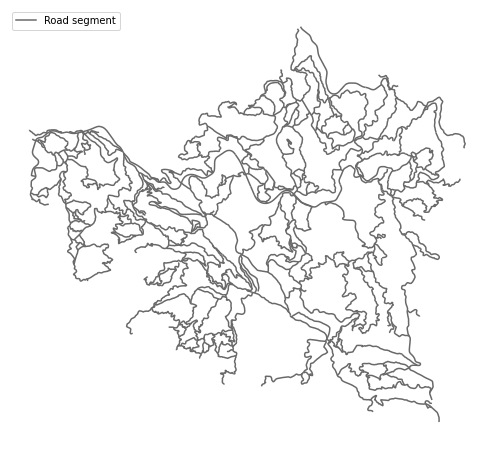

In [11]:
# Plot the roads' geometries
fig, ax = plt.subplots(figsize=(10, 8))
roads.plot(ax=ax, edgecolor='dimgray')

# Turn off axes
ax.axis('off')

# Create a custom legend using line handles
legend_lines = [
    Line2D([0], [0], color='dimgray', label='Road segment')
]

# Add the legend to the plot
ax.legend(handles=legend_lines, loc='upper left')

plt.show()

In [12]:
# value counts for categorical variables
print("Value counts for ...")
for col in ['OPERAC','TIPO_PISO','LARGURA','TIPO_VEICU']:
    print(f"\n{col}:")
    print(roads[col].value_counts())

Value counts for ...

OPERAC:
OPERAC
OPER    298
INOP     13
Name: count, dtype: int64

TIPO_PISO:
TIPO_PISO
A    172
T    138
Name: count, dtype: int64

LARGURA:
LARGURA
0.0    70
2.0    62
4.0    54
3.0    46
2.5    38
3.5    22
4.5     5
5.0     5
1.5     5
5.5     1
6.5     1
7.5     1
7.0     1
Name: count, dtype: int64

TIPO_VEICU:
TIPO_VEICU
VFCI    234
VTTR     77
Name: count, dtype: int64


### 🚧 Road Operability

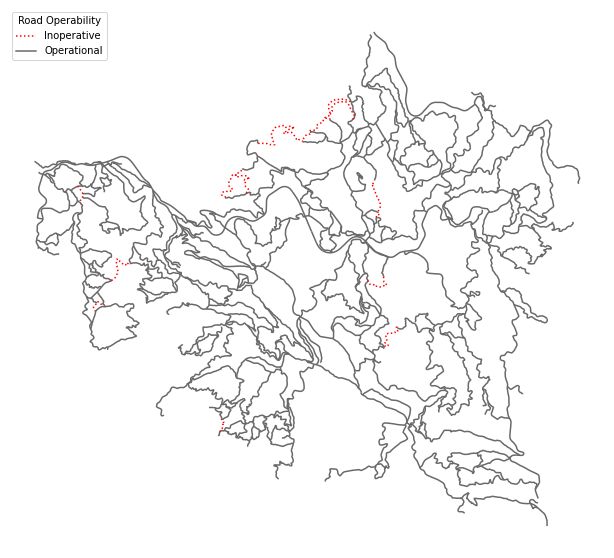

In [13]:
color_map = {'INOP': 'red', 'OPER': 'dimgrey'}
style_map = {'INOP': ':', 'OPER': '-'}

fig, ax = plt.subplots(figsize=(12, 10))

roads.plot(color=roads['OPERAC'].map(color_map),
           ax=ax,
           linestyle=roads['OPERAC'].map(style_map))

# Get counts for labels
oper_counts = roads['OPERAC'].value_counts()
inop_count = oper_counts.get('INOP', 0)
oper_count = oper_counts.get('OPER', 0)

# Create legend handles with Line2D
handles = [
    Line2D([0], [0], color='red', linestyle=':', label=f'Inoperative'),
    Line2D([0], [0], color='dimgray', linestyle='-', label=f'Operational')
]

ax.legend(handles=handles, title='Road Operability', loc='upper left')
ax.axis('off')

plt.show()

#### ⛔️ Inoperative roads

In [14]:
# look at ioperative roads
inop = roads[roads['OPERAC'] == 'INOP']
print(len(inop))
inop.head(1)

13


,Id,ID_RV,DATA_ACCAO,COD_INE,DESIGNACAO,OPERAC,REDE_DFCI,TIPO_PISO,COMPRIM,LARGURA,...,EXEC_2017,FIN_2017,FASE_2017,TIPO_VEICU,INTER_2018,EXEC_2018,FIN_2018,FASE_2018,OBSERV,geometry
144,145,145,2011-11-15,10603,RVF,INOP,3,T,456.35,2.0,...,0,0,0,VFCI,MAN,4,6,1,NaN,"LINESTRING (182507.875 446274.883, 182508.608 ..."


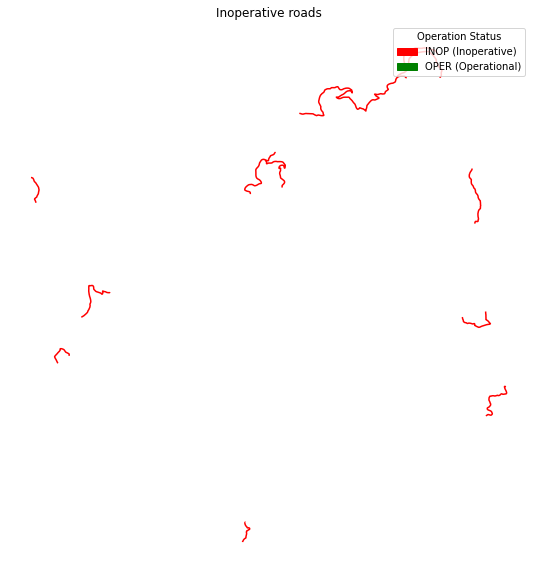

In [15]:
# plot inoperative roads
fig, ax = plt.subplots(figsize=(12, 10))
inop.plot(color=inop['OPERAC'].map(color_map), ax=ax)

# Create a custom legend for the operation statuses
handles = [
    mpatches.Patch(color='red', label='INOP (Inoperative)'),
    mpatches.Patch(color='green', label='OPER (Operational)')
]
ax.legend(handles=handles, title='Operation Status')
ax.axis('off')
plt.title('Inoperative roads')
plt.show()

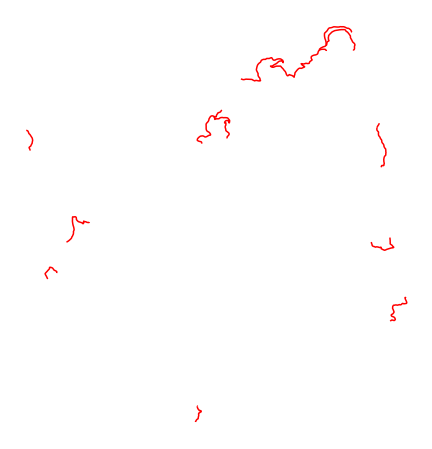

In [16]:
# Plot the geometries
ax = inop.plot(figsize=(10, 8), edgecolor='red')
ax.axis('off')  # Turn off the axes
plt.show()

### 🟢 Filter for operable roads only

In [17]:
roads.OPERAC.unique()

array(['OPER', 'INOP'], dtype=object)

#### 🔎 look at inop roads

In [18]:
roads[roads['OPERAC'] == 'INOP'].iloc[:,1:32]

,ID_RV,DATA_ACCAO,COD_INE,DESIGNACAO,OPERAC,REDE_DFCI,TIPO_PISO,COMPRIM,LARGURA,INTER_2014,...,INTER_2017,EXEC_2017,FIN_2017,FASE_2017,TIPO_VEICU,INTER_2018,EXEC_2018,FIN_2018,FASE_2018,OBSERV
144,145,2011-11-15,10603,RVF,INOP,3,T,456.35,2.0,ESI,...,ESI,0,0,0,VFCI,MAN,4,6,1,NaN
167,168,0202-01-06,10604,RVF,INOP,3,T,523.81,2.0,MAN,...,ESI,0,0,0,VFCI,ESI,0,0,0,NaN
176,177,2012-01-09,10604,RVF,INOP,3,T,523.39,2.0,ESI,...,ESI,0,0,0,VFCI,ESI,0,0,0,NaN
179,180,2012-01-09,10604,RVF,INOP,3,T,1125.10,2.0,MAN,...,ESI,0,0,0,VFCI,ESI,0,0,0,NaN
210,211,2012-01-23,10605,RVF,INOP,3,T,1294.18,2.0,ESI,...,ESI,0,0,0,VFCI,ESI,0,0,0,NaN
211,212,2012-01-23,10605,RVF,INOP,3,T,1066.10,1.5,ESI,...,ESI,0,0,0,VFCI,ESI,0,0,0,NaN
215,216,2012-01-24,10607,RVF,INOP,3,T,4721.24,1.5,MAN,...,ESI,0,0,0,VFCI,ESI,0,0,0,NaN
221,222,2012-02-03,10607,RVF,INOP,3,T,167.36,3.0,ESI,...,ESI,0,0,0,VFCI,ESI,0,0,0,NaN
222,223,2012-02-03,10607,RVF,INOP,3,T,1183.40,1.5,ESI,...,ESI,0,0,0,VFCI,ESI,0,0,0,NaN
275,275,2012-02-08,10603,RVF,INOP,3,T,857.15,1.5,MAN,...,ESI,0,0,0,VFCI,ESI,0,0,0,NaN


In [19]:
cat_cols = roads.select_dtypes(include='object').columns.drop('OPERAC')

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculate Cramér's V for two categorical series."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Bias correction
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1)) 
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = roads.select_dtypes(include='object').columns.drop('OPERAC')
cramers_v_scores = {}

for col in cat_cols:
    v = cramers_v(roads['OPERAC'], roads[col])
    cramers_v_scores[col] = v

# Display results sorted by strongest association
cramers_v_df = pd.DataFrame.from_dict(cramers_v_scores, orient='index', columns=['Cramers_V'])
cramers_v_df.sort_values(by='Cramers_V', ascending=False)


,Cramers_V
DATA_ACCAO,0.366983
INTER_2015,0.316721
INTER_2014,0.225224
INTER_2016,0.212660
TIPO_PISO,0.210144
DESIGNACAO,0.105568
TIPO_VEICU,0.083895
COD_INE,0.059347
INTER_2017,0.000000
INTER_2018,0.000000


In [20]:
pd.crosstab(roads.OPERAC, columns=[roads.TIPO_PISO, roads.REDE_DFCI, roads.TIPO_VEICU])

TIPO_PISO     A                   T          
REDE_DFCI     1    2         3    1    2    3
TIPO_VEICU VTTR VFCI VTTR VFCI VTTR VFCI VFCI
OPERAC                                       
INOP          0    0    0    0    0    0   13
OPER         73   48    2   49    2    9  114

- all roads that are marked as inoperable are unpaved (TIPO_PISO = T)
- part of categorie 3 of the REDE_DFCI (so small support roads but not main roads)
- can only be usedby VCFI

In [21]:
pd.crosstab(roads.OPERAC, columns=[roads.LARGURA])

LARGURA,0.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.5,7.0,7.5
OPERAC,,,,,,,,,,,,,
INOP,0,4,8,0,1,0,0,0,0,0,0,0,0
OPER,70,1,54,38,45,22,54,5,5,1,1,1,1


All inoperable roads are 3m or smaller. For timber we need roads width a min width of 3meters, so removing the ones <3m would be necessary in a later step anyway.

In [22]:
pd.crosstab(roads.OPERAC, columns=[roads.FASE_2014, roads.FASE_2015, roads.FASE_2016, roads.FASE_2017, roads.FASE_2018])

FASE_2014    0            1      
FASE_2015    0        1   0      
FASE_2016    0     1  0   0     1
FASE_2017    0     0  0   0  1  0
FASE_2018    0  1  0  0   0  6  0
OPERAC                           
INOP         3  1  3  2   3  0  1
OPER       266  7  5  4  12  4  0

In [23]:
pd.crosstab(roads.OPERAC, columns=[roads.INTER_2014, roads.INTER_2015, roads.INTER_2016, roads.INTER_2017, roads.INTER_2018])

INTER_2014  ESI             MAN        
INTER_2015  ESI         MAN ESI        
INTER_2016  ESI     MAN ESI ESI     MAN
INTER_2017  ESI     ESI ESI ESI MAN ESI
INTER_2018  ESI MAN ESI ESI ESI ESI ESI
OPERAC                                 
INOP          1   1   2   4   4   0   1
OPER        266   7   5   4  12   4   0

-> most inoperable roads were in maintenance some time in between 2014-2018.

Anyway, we can not keep inoperable roads in our dataset, because if we connect future road network to an inoperable road, it might be a bottleneck. so let's remove them.

#### 🟢 keep operable roads only

OPERAC
OPER    298
Name: count, dtype: int64


C:\Users\johan\AppData\Local\Temp\ipykernel_3944\2603032853.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mpatches.Patch(color='green', label=f'OPER (Operational): {roads.OPERAC.value_counts()[0]}')


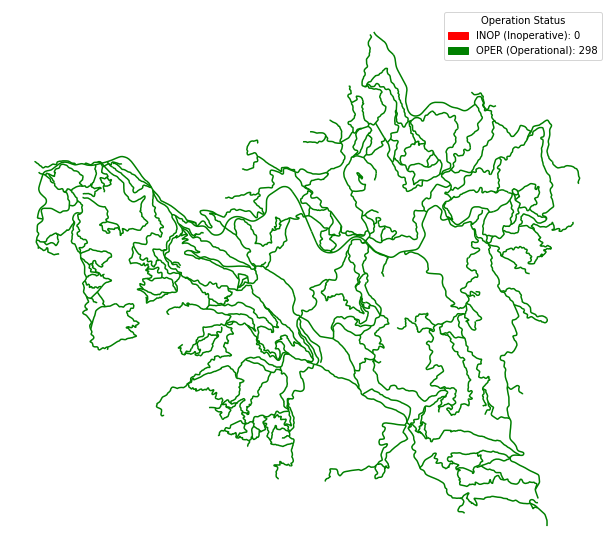

In [24]:
# Filter for operable roads only
roads = roads[roads['OPERAC'] == 'OPER']

# Verify the count after removal
print(roads['OPERAC'].value_counts())

# Define a color map for 'OPERAC' where 'INOP' is red and 'OPER' is green
color_map = {'INOP': 'red', 'OPER': 'green'}

# Plot the road geometries with specific colors based on the 'OPERAC' status
fig, ax = plt.subplots(figsize=(12, 10))
roads.plot(color=roads['OPERAC'].map(color_map), ax=ax)

# Create a custom legend for the operation statuses

handles = [
    mpatches.Patch(color='red', label=f'INOP (Inoperative): 0'),
    mpatches.Patch(color='green', label=f'OPER (Operational): {roads.OPERAC.value_counts()[0]}')
]
ax.legend(handles=handles, title='Operation Status')
ax.axis('off')

#plt.title('Roads Colored by Operation Status ("OPERAC")')
plt.show()

In [25]:
print('Total operable road network length (m)', roads.COMPRIM.sum())

Total operable road network length (m) 376454.98


### ↔️ Road Width

In [26]:
pd.crosstab(roads.LARGURA, columns=roads.LARGURA.count())

col_0,298
LARGURA,
0.0,70
1.5,1
2.0,54
2.5,38
3.0,45
3.5,22
4.0,54
4.5,5
5.0,5


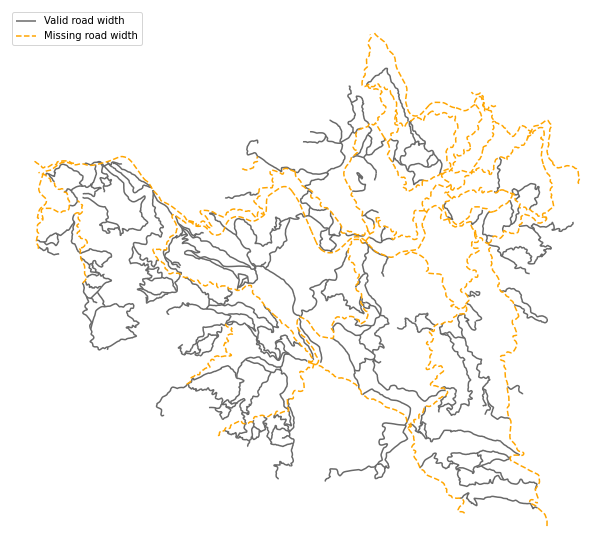

In [27]:
# mask for valid (non-zero, non-missing) LARGURA
valid_width = roads['LARGURA'] > 0
invalid_width = ~valid_width  # zero or NaN

# Scale factor to make the widths visually reasonable
scaling_factor = 0.5

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot roads with valid widths using scaled linewidths
roads[valid_width].plot(
    ax=ax,
    #linewidth=roads[valid_width]['LARGURA'] * scaling_factor,
    color='dimgrey',
    label='Valid road width'
)

# Plot roads with missing or zero width as dotted
roads[invalid_width].plot(
    ax=ax,
    #linewidth=1.5,
    linestyle='--',
    color='orange',
    label='Missing road width'
)

# Legend and final touches
ax.legend(loc='upper left')
ax.axis('off')

plt.show()

In [28]:
# look at connection between LARGURA and other features
roads.loc[:, 'LARGURA_ZERO'] = roads['LARGURA'] == 0
categorical_cols = ['OPERAC', 'REDE_DFCI', 'TIPO_PISO', 'FASE_2018', 'TIPO_VEICU', 'DESIGNACAO']

for col in categorical_cols:
    print(f"\n{col} vs LARGURA_ZERO")
    print(pd.crosstab(roads[col], roads['LARGURA_ZERO'], normalize='index'))  # row-normalized


OPERAC vs LARGURA_ZERO
LARGURA_ZERO     False     True 
OPERAC                          
OPER          0.765101  0.234899

REDE_DFCI vs LARGURA_ZERO
LARGURA_ZERO     False     True 
REDE_DFCI                       
1             0.106667  0.893333
2             0.983333  0.016667
3             0.987730  0.012270

TIPO_PISO vs LARGURA_ZERO
LARGURA_ZERO     False     True 
TIPO_PISO                       
A             0.593023  0.406977
T             1.000000  0.000000

FASE_2018 vs LARGURA_ZERO
LARGURA_ZERO     False     True 
FASE_2018                       
0             0.756098  0.243902
1             1.000000  0.000000
6             1.000000  0.000000

TIPO_VEICU vs LARGURA_ZERO
LARGURA_ZERO     False     True 
TIPO_VEICU                      
VFCI          0.986425  0.013575
VTTR          0.129870  0.870130

DESIGNACAO vs LARGURA_ZERO
LARGURA_ZERO       False     True 
DESIGNACAO                        
EN222           0.000000  1.000000
EN224           0.000000  1.000000
REM   

c:\Users\johan\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


- ✅ **Very Strong Positive Correlation with `LARGURA == 0`:**
  - `REDE_DFCI == 1`
  - `TIPO_VEICU == VTTR`
  - `DESIGNACAO=EN`or `VARIANTE EN`s always have width = 0 in the data.

  **Moderate**
  - `TIPO_PISO == A`
  - `FASE_2018 == 0`
  - `DESIGNACAO=REM`shows a moderate portion (25%) of zero-width roads.

- 🚫 **Strong Negative Correlation (mostly non-zero width):**
  - `REDE_DFCI == 2 or 3`
  - `TIPO_VEICU == VFCI`
  - `TIPO_PISO == T`
  - `FASE_2018 == 1 or 6`
  - `DESIGNACAO=RVF` is almost entirely composed of roads with valid width


❌ EN222, EN224, VARIANTE EN108, VARIANTE EN222 → always zero-width → possibly invalid or placeholder entries

⚠️ REM → mix of valid and zero-width

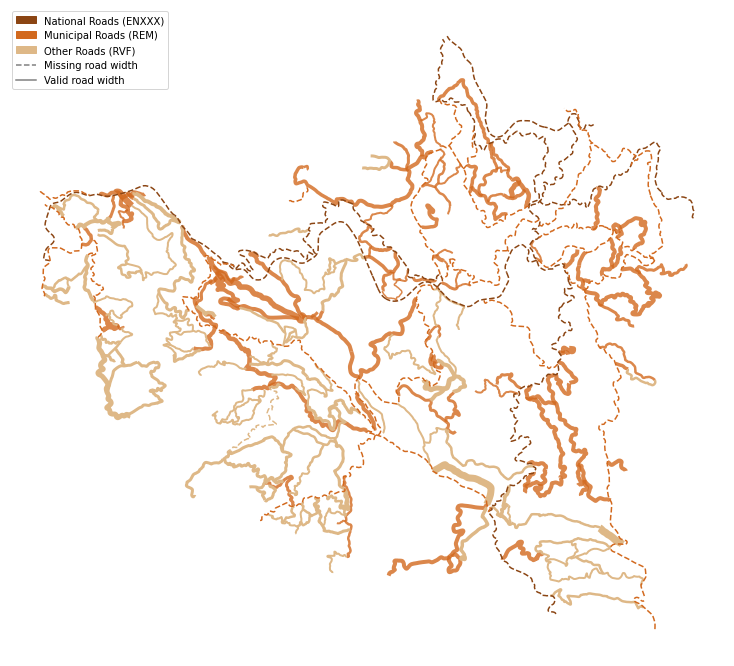

In [29]:
scaling_factor = 1

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(14, 12))

# Plot the roads with LARGURA > 0 as solid black lines sized by their width
#roads[roads.LARGURA > 0].plot(color='black', linewidth=roads.LARGURA * scaling_factor, ax=ax, label='Roads (Largura > 0)', legend=True)

# Plot national roads (ENXXX) as solid lines sized by their width
roads[roads['DESIGNACAO'].str.contains('EN')].plot(
    color='saddlebrown',
    linewidth=roads[roads['DESIGNACAO'].str.contains('EN')]['LARGURA'] * scaling_factor,
    alpha=.8, ax=ax, label='National Roads (ENXXX)')

# Plot municipal roads (REM) as solid lines sized by their width
roads[roads['DESIGNACAO']=='REM'].plot(
    color='chocolate',
    linewidth=roads[roads['DESIGNACAO'] == 'REM']['LARGURA'] * scaling_factor,
    alpha=.8, ax=ax, label='Municipal Roads (REM)')

# Plot other roads (RVF) as  solid lines sized by their width
roads[roads['DESIGNACAO']=='RVF'].plot(
    color='burlywood',
    linewidth=roads[roads['DESIGNACAO'] == 'RVF']['LARGURA'] * scaling_factor,
    ax=ax, label='Other Roads (RVF)')

# Plot the roads with LARGURA = 0 as thin dashed lines
#roads[roads.LARGURA == 0].plot(color='grey', linewidth=1, linestyle='--', ax=ax, label='Roads (Largura = 0)')
# Plot the roads with LARGURA = 0 as thin dashed lines
roads[(roads['DESIGNACAO'].str.contains('EN')) & (roads.LARGURA == 0)].plot(
    color='saddlebrown',
    alpha=1, ax=ax, label='National Roads (ENXXX)', linestyle='--'
)

roads[(roads['DESIGNACAO'] == 'REM') & (roads.LARGURA == 0)].plot(
    color='chocolate',
    alpha=1, ax=ax, label='Municipal Roads (REM)', linestyle='--'
)

roads[(roads['DESIGNACAO'] == 'RVF') & (roads.LARGURA == 0)].plot(
    color='burlywood',
    alpha=1, ax=ax, label='Other Roads (RVF)', linestyle='--'
)

# Create a custom legend for the categories
handles = handles = [
    mpatches.Patch(color='saddlebrown', label='National Roads (ENXXX)'),
    mpatches.Patch(color='chocolate', label='Municipal Roads (REM)'),
    mpatches.Patch(color='burlywood', label='Other Roads (RVF)'),
    Line2D([0], [0], color='grey', linestyle='--', label=f'Missing road width'),
    Line2D([0], [0], color='grey', linestyle='solid', label=f'Valid road width')  # Adding dashed style for unknown
]   
ax.legend(handles=handles, loc='upper left')
ax.axis('off')

plt.show()

In [30]:
# Frequency Table
pd.crosstab(index=[roads['REDE_DFCI']], columns=roads['LARGURA'])

LARGURA,0.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.5,7.0,7.5
REDE_DFCI,,,,,,,,,,,,,
1,67,0,0,0,0,0,5,0,0,0,1,1,1
2,1,0,0,0,1,2,46,5,4,1,0,0,0
3,2,1,54,38,44,20,3,0,1,0,0,0,0


In [31]:
roads[(roads.LARGURA == 0) & (roads.REDE_DFCI != 1)]

,Id,ID_RV,DATA_ACCAO,COD_INE,DESIGNACAO,OPERAC,REDE_DFCI,TIPO_PISO,COMPRIM,LARGURA,...,FIN_2017,FASE_2017,TIPO_VEICU,INTER_2018,EXEC_2018,FIN_2018,FASE_2018,OBSERV,geometry,LARGURA_ZERO
142,143,143,2011-11-15,10603,RVF,OPER,3,A,3004.61,0.0,...,0,0,VFCI,ESI,0,0,0,NaN,"LINESTRING (181654.043 447502.126, 181655.839 ...",True
212,213,213,2012-01-23,10605,REM,OPER,3,A,671.80,0.0,...,0,0,VFCI,ESI,0,0,0,NaN,"LINESTRING (183081.605 453055.288, 183085.476 ...",True
309,318,318,1899-12-30,10604,REM,OPER,2,A,180.63,0.0,...,0,0,VFCI,ESI,0,0,0,NaN,"LINESTRING (178750.951 451897.591, 178763.609 ...",True


In [32]:
roads[(roads.LARGURA == 0) & (roads.REDE_DFCI != 1)].iloc[:,15:25]

,EXEC_2015,FIN_2015,FASE_2015,INTER_2016,EXEC_2016,FIN_2016,FASE_2016,INTER_2017,EXEC_2017,FIN_2017
142,0,0,0,ESI,0,0,0,ESI,0,0
212,0,0,0,MAN,4,6,1,ESI,0,0
309,0,0,0,ESI,0,0,0,ESI,0,0


In [33]:
# Frequency Table
pd.crosstab(index=[roads['REDE_DFCI'], roads['TIPO_VEICU']], 
                               columns=roads['LARGURA'])

LARGURA               0.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.5  \
REDE_DFCI TIPO_VEICU                                                          
1         VTTR         67    0    0    0    0    0    5    0    0    0    1   
2         VFCI          1    0    0    0    1    2   44    5    4    1    0   
          VTTR          0    0    0    0    0    0    2    0    0    0    0   
3         VFCI          2    1   54   38   44   20    3    0    1    0    0   

LARGURA               7.0  7.5  
REDE_DFCI TIPO_VEICU            
1         VTTR          1    1  
2         VFCI          0    0  
          VTTR          0    0  
3         VFCI          0    0

In [34]:
# Frequency Table
pd.crosstab(index=roads['LARGURA'], 
                               columns=[roads['REDE_DFCI'], roads['TIPO_PISO'], roads.DESIGNACAO])

REDE_DFCI      1                                               2              \
TIPO_PISO      A                                           T   A       T       
DESIGNACAO EN222 EN224 REM VARIANTE EN108 VARIANTE EN222 RVF REM RVF REM RVF   
LARGURA                                                                        
0.0            7    10  37              4              9   0   1   0   0   0   
1.5            0     0   0              0              0   0   0   0   0   0   
2.0            0     0   0              0              0   0   0   0   0   0   
2.5            0     0   0              0              0   0   0   0   0   0   
3.0            0     0   0              0              0   0   1   0   0   0   
3.5            0     0   0              0              0   0   1   1   0   0   
4.0            0     0   5              0              0   0  37   1   5   2   
4.5            0     0   0              0              0   0   4   0   0   1   
5.0            0     0   0              0              0   0   3   0   0   1   
5.5            0     0   0              0              0   0   1   0   0   0   
6.5            0     0   1              0              0   0   0   0   0   0   
7.0            0     0   0              0              0   1   0   0   0   0   
7.5            0     0   0              0              0   1   0   0   0   0   

REDE_DFCI    3              
TIPO_PISO    A       T      
DESIGNACAO REM RVF REM RVF  
LARGURA                     
0.0          1   1   0   0  
1.5          0   0   1   0  
2.0          7   0   8  39  
2.5          7   1   4  26  
3.0         11   1   5  27  
3.5         14   3   0   3  
4.0          2   1   0   0  
4.5          0   0   0   0  
5.0          0   0   0   1  
5.5          0   0   0   0  
6.5          0   0   0   0  
7.0          0   0   0   0  
7.5          0   0   0   0

In [35]:
# Frequency Table
pd.crosstab(index=[roads.REDE_DFCI, roads.DESIGNACAO], 
                               columns=[roads.TIPO_PISO, roads.LARGURA])

TIPO_PISO                  A                                       T          \
LARGURA                  0.0 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.5 1.5 2.0 2.5   
REDE_DFCI DESIGNACAO                                                           
1         EN222            7   0   0   0   0   0   0   0   0   0   0   0   0   
          EN224           10   0   0   0   0   0   0   0   0   0   0   0   0   
          REM             37   0   0   0   0   5   0   0   0   1   0   0   0   
          RVF              0   0   0   0   0   0   0   0   0   0   0   0   0   
          VARIANTE EN108   4   0   0   0   0   0   0   0   0   0   0   0   0   
          VARIANTE EN222   9   0   0   0   0   0   0   0   0   0   0   0   0   
2         REM              1   0   0   1   1  37   4   3   1   0   0   0   0   
          RVF              0   0   0   0   1   1   0   0   0   0   0   0   0   
3         REM              1   7   7  11  14   2   0   0   0   0   1   8   4   
          RVF              1   0   1   1   3   1   0   0   0   0   0  39  26   

TIPO_PISO                                             
LARGURA                  3.0 3.5 4.0 4.5 5.0 7.0 7.5  
REDE_DFCI DESIGNACAO                                  
1         EN222            0   0   0   0   0   0   0  
          EN224            0   0   0   0   0   0   0  
          REM              0   0   0   0   0   0   0  
          RVF              0   0   0   0   0   1   1  
          VARIANTE EN108   0   0   0   0   0   0   0  
          VARIANTE EN222   0   0   0   0   0   0   0  
2         REM              0   0   5   0   0   0   0  
          RVF              0   0   2   1   1   0   0  
3         REM              5   0   0   0   0   0   0  
          RVF             27   3   0   0   1   0   0

**Since the proportion of missing road width values is so high, we can not reasonable just delete the rows with missing values. We need to fill the holes.** 

#### 🩹 Filling data holes
We need to fill the holes. Can be done based on roadwidth standards for the REDE DFCI, which category (1 2 3) is contained in the data for all roads. 

In [36]:
# Conditions
conditions = [
    roads['LARGURA'] != 0,
    (roads['LARGURA'] == 0) & (roads['REDE_DFCI'] == 1),
    (roads['LARGURA'] == 0) & (roads['REDE_DFCI'] == 2),
    (roads['LARGURA'] == 0) & (roads['REDE_DFCI'] == 3)
]

# Corresponding values
values = [
    roads['LARGURA'],
    6,
    4,
    3
]

# Create new column
roads['ROADWIDTH'] = np.select(conditions, values, default=np.nan)

c:\Users\johan\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [37]:
# verify the assigment of raod width values
pd.crosstab(roads.REDE_DFCI, roads.ROADWIDTH)

ROADWIDTH,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5
REDE_DFCI,,,,,,,,,,,,,
1,0,0,0,0,0,5,0,0,0,67,1,1,1
2,0,0,0,1,2,47,5,4,1,0,0,0,0
3,1,54,38,46,20,3,0,1,0,0,0,0,0


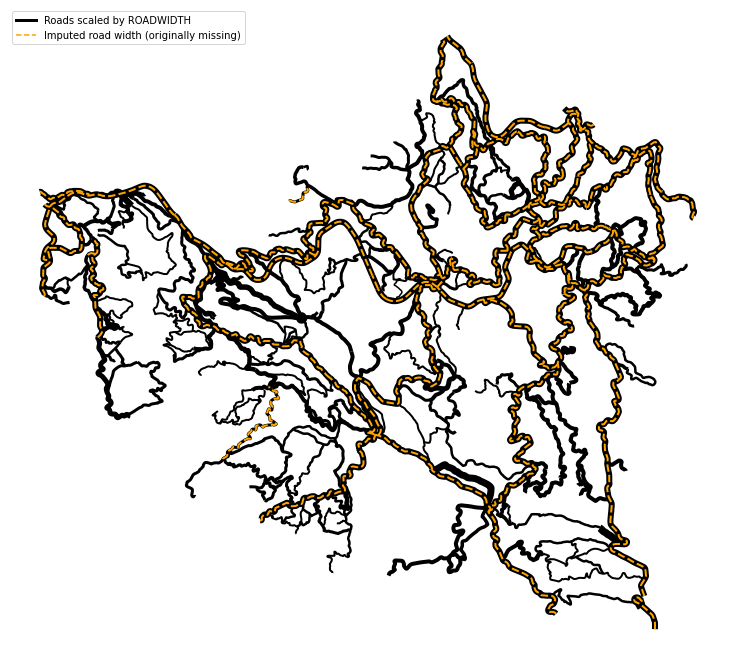

In [38]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 12))
scaling_factor = 1

# Plot all roads in black
roads.plot(
    color='black',
    linewidth=roads['ROADWIDTH'] * scaling_factor,
    alpha=1,
    ax=ax
)

# Overlay roads where LARGURA was originally 0 with dashed white line
roads[roads['LARGURA'] == 0].plot(
    color='orange',
    linewidth=2,
    linestyle='--',
    ax=ax,
    label='Imputed road width (originally missing)'
)

# Legend for dashed line only
handles = [
    Line2D([0], [0], color='black', lw=3, label='Roads scaled by ROADWIDTH'),
    Line2D([0], [0], color='orange', linestyle='--', label='Imputed road width (originally missing)')
]

ax.legend(handles=handles, loc='upper left')
ax.axis('off')
plt.show()

In [39]:
# Count rows where LARGURA > ROADWIDTH
count_larger = (roads['LARGURA'] > roads['ROADWIDTH']).sum()

# Count rows where LARGURA < ROADWIDTH
count_smaller = ((roads['LARGURA'] < roads['ROADWIDTH']) & (roads['LARGURA']!=0 )).sum()
count_0 = (roads['LARGURA']== 0).sum()

# Count rows where LARGURA == ROADWIDTH
count_equal = (roads['LARGURA'] == roads['ROADWIDTH']).sum()

# Print the results
print("Rows where LARGURA > ROADWIDTH:", count_larger)
print("Rows where LARGURA < ROADWIDTH & LARGURA NONZERO:", count_smaller)
print("Rows where LARGURA == ROADWIDTH:", count_equal)
print("Rows where LARGURA == 0:", count_0)
print('Sum: ', count_larger + count_smaller + count_0 + count_equal)
print('# Roads:', len(roads))


Rows where LARGURA > ROADWIDTH: 0
Rows where LARGURA < ROADWIDTH & LARGURA NONZERO: 0
Rows where LARGURA == ROADWIDTH: 228
Rows where LARGURA == 0: 70
Sum:  298
# Roads: 298


This changed the roadwidth value of 183 roads to wider than in `LARGURA` column, of 17 roads to smaller than in `LARGURA` column, and for 70 roads, we before had a zero value and now have usable data.

### 💾 save the cleaned roads dataset to shapefile

In [40]:
# save roads to file
output_path = '1_Preprocessed_Data/1_Roads_clean'
os.makedirs(output_path, exist_ok=True)
roads.to_file(f'{output_path}/roads_clean.shp')
print('saved file')

C:\Users\johan\AppData\Local\Temp\ipykernel_3944\2034743908.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  roads.to_file(f'{output_path}/roads_clean.shp')


saved file


### Create two separate road networks: Timber Roads vs. Fire Roads

- "Normal" timber roads (minimum width 3m);
- Wider roads for firefighting access (minimum width 6m).

This step is useful, because the future road network needs to be connected to the existing road network, and ideally, the newly build wider roads always connect to a preexisting wider road (instead of only a small timber one, which could create a bottleneck in firefighting traffic when there is a firetruck passing along a newly built wider road segment, but gets stuck as soon as a preexisting road segment is reached with only a width of 3m).


In [41]:
print('# roads in total:',len(roads))
print('# roads with ROADWIDTH >= 3:',len(roads[(roads['ROADWIDTH'] >= 3)]))
print('# roads with ROADWIDTH >= 6:',len(roads[(roads['ROADWIDTH'] >= 6)]))

# roads in total: 298
# roads with ROADWIDTH >= 3: 205
# roads with ROADWIDTH >= 6: 70


#### create the set of timber roads

In [42]:
# Filter roads to create df fireroads where roadwidth>=6
timberroads = roads[(roads['ROADWIDTH'] >= 3)].copy()

# How many roads are suitable for big road network connection?
len(timberroads)

205

#### which roads are too small for us?

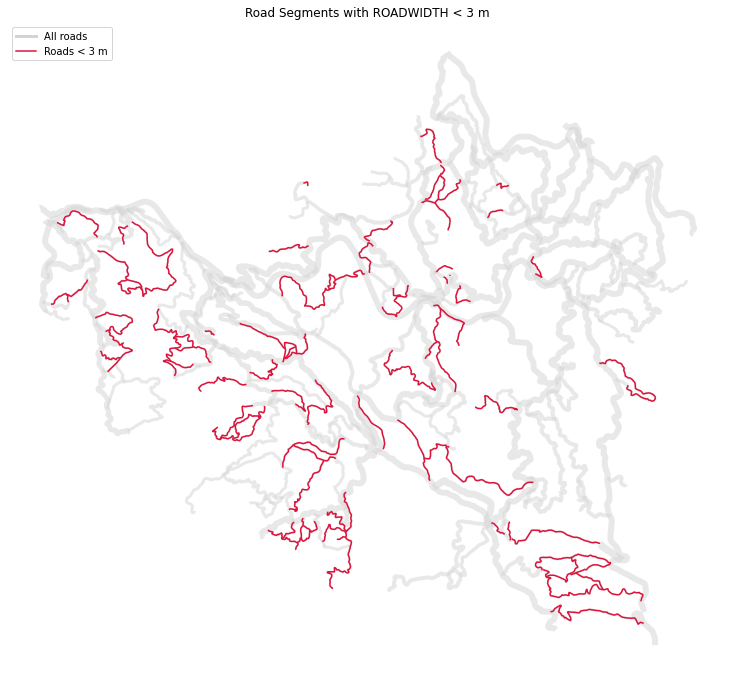

In [43]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot all roads in light grey
roads.plot(
    color='lightgrey',
    linewidth=roads['ROADWIDTH'],
    ax=ax,
    alpha=0.5
)

# Plot roads with ROADWIDTH < 3 in red
roads[roads['ROADWIDTH'] < 3].plot(
    color='crimson',
    linewidth=1.5,
    linestyle='-',
    ax=ax,
    label='Roads < 3 m'
)

# Custom legend
handles = [
    Line2D([0], [0], color='lightgrey', lw=3, label='All roads'),
    Line2D([0], [0], color='crimson', lw=1.5, linestyle='-', label='Roads < 3 m')
]

ax.legend(handles=handles, loc='upper left')
ax.set_title("Road Segments with ROADWIDTH < 3 m")
ax.axis('off')
plt.show()

In [44]:
pd.crosstab(roads.ROADWIDTH, columns=roads.DESIGNACAO)

DESIGNACAO,EN222,EN224,REM,RVF,VARIANTE EN108,VARIANTE EN222
ROADWIDTH,,,,,,
1.5,0,0,1,0,0,0
2.0,0,0,15,39,0,0
2.5,0,0,11,27,0,0
3.0,0,0,18,29,0,0
3.5,0,0,15,7,0,0
4.0,0,0,51,4,0,0
4.5,0,0,4,1,0,0
5.0,0,0,3,2,0,0
5.5,0,0,1,0,0,0


#### create the set of wide roads only

In [45]:
# Filter roads to create df fireroads where roadwidth>=6
fireroads = roads[(roads['ROADWIDTH'] >= 6)].copy()

# How many roads are suitable for big road network connection?
len(fireroads)

70

In [46]:
# save sets of roads to file
output_path = '1_Preprocessed_Data/1_Roads_clean'
os.makedirs(output_path, exist_ok=True)
fireroads.to_file(f'{output_path}/roads_min_6m.shp')
timberroads.to_file(f'{output_path}/roads_min_3m.shp')
print('saved file')

C:\Users\johan\AppData\Local\Temp\ipykernel_3944\394477794.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  fireroads.to_file(f'{output_path}/roads_min_6m.shp')
C:\Users\johan\AppData\Local\Temp\ipykernel_3944\394477794.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  timberroads.to_file(f'{output_path}/roads_min_3m.shp')


saved file


#### visualize separated sets of road

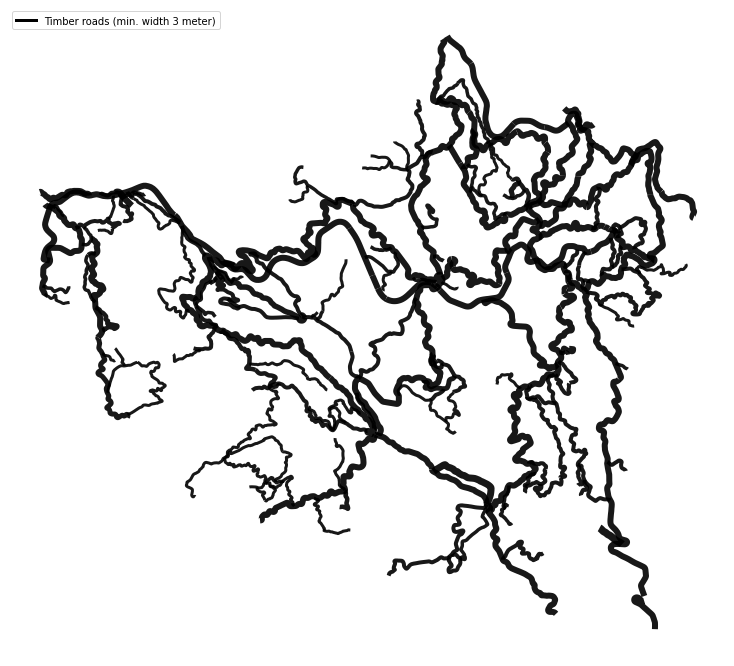

In [47]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 12))
scaling_factor = 1

# Plot all timber roads in black
timberroads.plot(
    color='black',
    linewidth=timberroads['ROADWIDTH'] * scaling_factor,
    alpha=0.9,
    ax=ax
)

# Legend for both line types
handles = [
    Line2D([0], [0], color='black', lw=3, label='Timber roads (min. width 3 meter)')
]

ax.legend(handles=handles, loc='upper left')
ax.axis('off')
plt.show()

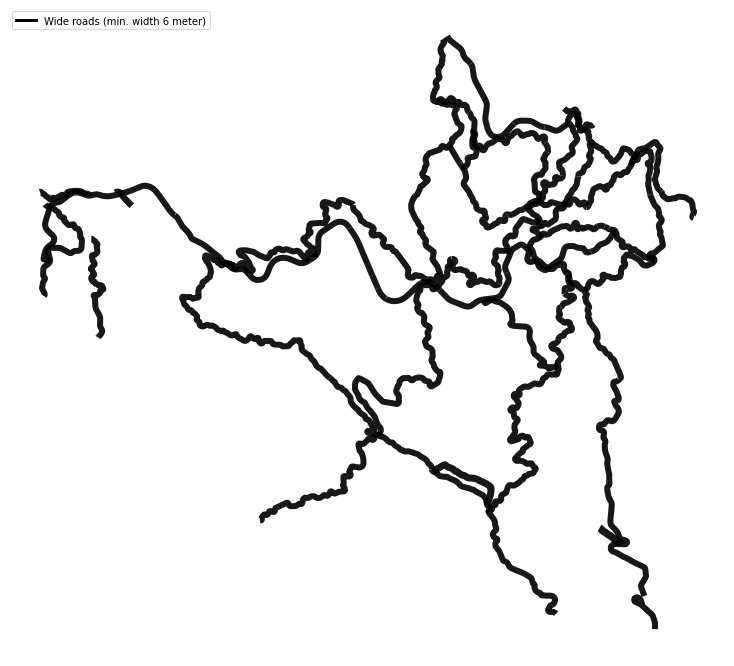

In [48]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 12))
scaling_factor = 1

# Plot all timber roads in black
fireroads.plot(
    color='black',
    linewidth=fireroads['ROADWIDTH'] * scaling_factor,
    alpha=0.9,
    ax=ax
)

# Legend for both line types
handles = [
    Line2D([0], [0], color='black', lw=3, label='Wide roads (min. width 6 meter)')
]

ax.legend(handles=handles, loc='upper left')
ax.axis('off')
plt.show()


## 🌲 Stands

In [49]:
# load shapefile into geodataframe
stands = gpd.read_file(r'1_Preprocessed_Data\0_Forest_Management_Units_manuallycleaned\CasteloPaiva_clean.shp')
print('shapefile loaded, stands gdf shape:', stands.shape)
print(stands.columns)
stands.head(2)

# Total number of stands
print('# Total stands:', len(stands))

# Print number of unique IDs (replace 'ID' with actual column name if different)
print('# Unique stand IDs:', stands['ID_UG'].nunique())


shapefile loaded, stands gdf shape: (687, 28)
Index(['OBJECTID', 'TARGET_FID', 'LandUse_1', 'Ocupacao', 'ID_UG', 'NOME',
       'YY_correct', 'XX_Correct', 'Altitude', 'Declive', 'Litologia',
       'Relevo', 'Uso', 'Espessura', 'Apt_flor', 'Solo', 'Classifica',
       'Perimetro', 'Area', 'Hectares', 'UsoSolo20', 'Shape_Leng',
       'Shape_Area', 'HBC', 'CH', 'CBD', 'CC', 'geometry'],
      dtype='object')
# Total stands: 687
# Unique stand IDs: 687


#### 👁️ Visualize + Basics

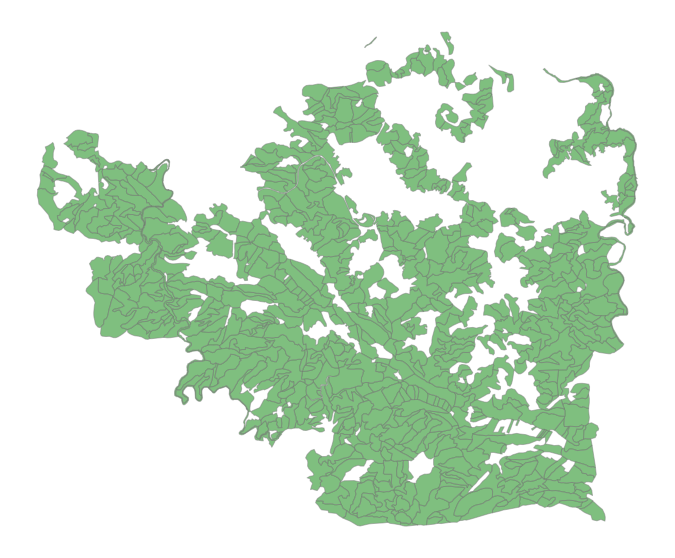

In [50]:
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the size (width, height) as needed

# Plot the stands with specified colors
stands.plot(ax=ax, edgecolor='grey', facecolor='green', alpha=.5)
# Turn off the axis
ax.axis('off')

# Show the plot
plt.show()

### 🔍 Check for Multipolygons after manual QGIS cleaning 

In [51]:
# check for MultiPolygon geometries
stands.loc[stands.geometry.type == 'MultiPolygon']

,OBJECTID,TARGET_FID,LandUse_1,Ocupacao,ID_UG,NOME,YY_correct,XX_Correct,Altitude,Declive,...,Area,Hectares,UsoSolo20,Shape_Leng,Shape_Area,HBC,CH,CBD,CC,geometry


c:\Users\johan\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


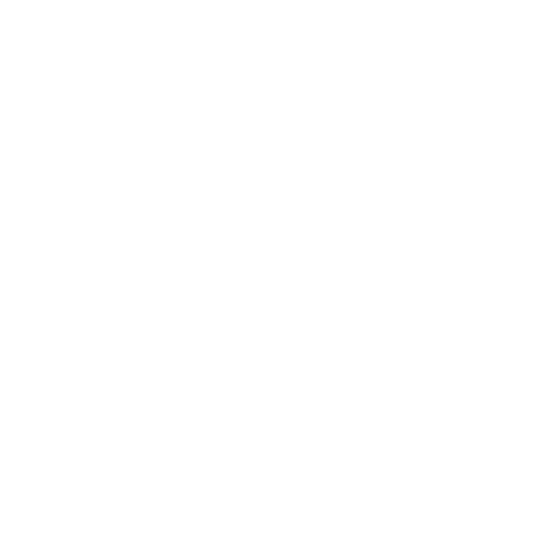

In [52]:
# plot the multigeometries, if any, to get an idea what needs fixing
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the size (width, height) as needed

# Plot the stands with specified colors
stands.loc[stands.geometry.type == 'MultiPolygon'].plot(ax=ax, edgecolor='grey', facecolor='green', alpha=.5)
# Turn off the axis
ax.axis('off')

# Show the plot
plt.show()

In [53]:
# check for the Polygon geometries
len(stands.loc[stands.geometry.type == 'Polygon'])

687

In [54]:
# Check for duplicate UG_IDs
stands[stands['ID_UG'].duplicated(keep=False)]

,OBJECTID,TARGET_FID,LandUse_1,Ocupacao,ID_UG,NOME,YY_correct,XX_Correct,Altitude,Declive,...,Area,Hectares,UsoSolo20,Shape_Leng,Shape_Area,HBC,CH,CBD,CC,geometry


## 📐 Align the CRS

In [55]:
# Check the CRS of the GeoDataFrames
print('stands CRS:',stands.crs)
print('roads CRS:', roads.crs)

stands CRS: PROJCRS["ETRS89 / Portugal TM06",BASEGEOGCRS["ETRS89",DATUM["European Terrestrial Reference System 1989",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ID["EPSG",6258]],PRIMEM["Greenwich",0,ANGLEUNIT["Degree",0.0174532925199433]]],CONVERSION["unnamed",METHOD["Transverse Mercator",ID["EPSG",9807]],PARAMETER["Latitude of natural origin",39.6682583333333,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",-8.13310833333333,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",1,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",0,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,3],AXIS["(E)",east,ORDER[1],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["(N)",north,ORDER[2],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["ellipsoidal height (h)",up,ORDER[3],LENGTHUNIT["metre",1,ID["EPSG",9001]]]]

In [56]:
# convert roads CRS to the stands' CRS
fireroads = fireroads.to_crs(stands.crs)
timberroads = timberroads.to_crs(stands.crs)

# Check the CRS
print(stands.crs)
print(timberroads.crs)
print(fireroads.crs)

PROJCRS["ETRS89 / Portugal TM06",BASEGEOGCRS["ETRS89",DATUM["European Terrestrial Reference System 1989",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ID["EPSG",6258]],PRIMEM["Greenwich",0,ANGLEUNIT["Degree",0.0174532925199433]]],CONVERSION["unnamed",METHOD["Transverse Mercator",ID["EPSG",9807]],PARAMETER["Latitude of natural origin",39.6682583333333,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",-8.13310833333333,ANGLEUNIT["Degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",1,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",0,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,3],AXIS["(E)",east,ORDER[1],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["(N)",north,ORDER[2],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["ellipsoidal height (h)",up,ORDER[3],LENGTHUNIT["metre",1,ID["EPSG",9001]]]]
PROJCRS["ET

### 👁️ Visualize stands and roads together

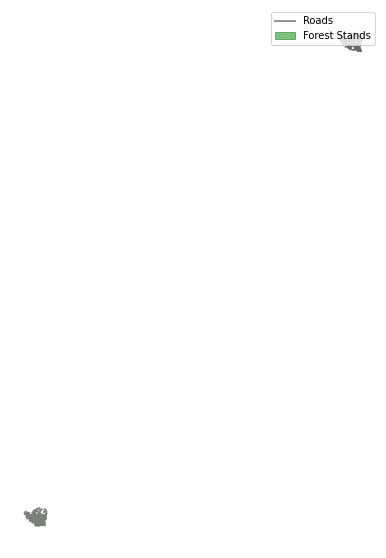

In [57]:
# Create a plot for the forest stands with roads
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the forest stands
stands.plot(ax=ax, color='green', alpha=0.5, label='Forest Stands', edgecolor='grey')

# Plot the roads
roads.plot(ax=ax, color='dimgrey', label='Roads', alpha=1)

road_line = Line2D([0], [0], color='dimgrey', lw=2, label='Roads', alpha=0.7)  # Line for roads
stand_patch = mpatches.Patch(color='green', label='Forest Stands', alpha=0.5)

# Add the legend to the plot
ax.legend(handles=[road_line, stand_patch])
ax.axis('off')

#plt.title('Forest Stands')
plt.show()

## 🔎 Analysis: Categorize stands according to their accessibility

We wanna create three subsets of stands:
1. the stands crossed by/ touching pre-existing wide roads,
2. the stands unaccessible via wide roads, but crossed by/ touching pre-existing small roads,
3. the stands that are totally inaccessible via the existing roads.

In [58]:
print("Stands total:", len(stands))

Stands total: 687


### Identify accessibility via wide roads

In [59]:
stands_touching_fireroads = stands[stands.geometry.intersects(fireroads.unary_union)]

print("Stands touching wide roads:")
print(len(stands_touching_fireroads))

Stands touching wide roads:
184


#### 👁️ visualize

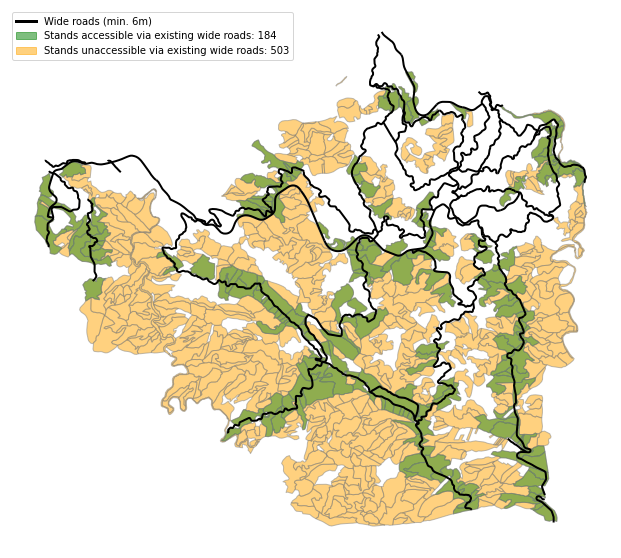

In [60]:
# visualize for big roads
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the roads
fireroads.plot(ax=ax, color='black', label='Roads', lw=2)

# Plot stands
stands.plot(ax=ax, color='orange', label='Stands', alpha=0.5, edgecolor ='grey')
stands_touching_fireroads.plot(ax=ax, color='forestgreen', alpha=0.5, edgecolor='grey')

# Create custom legend handles
road_line = Line2D([0], [0], color='black', lw=3, label='Wide roads (min. 6m)', alpha=1)  # Line for roads
stand_patch = mpatches.Patch(color='orange', label=f'Stands unaccessible via existing wide roads: {len(stands)-len(stands_touching_fireroads)}', alpha=0.5)
touching_stand_patch = mpatches.Patch(color='green', label=f'Stands accessible via existing wide roads: {len(stands_touching_fireroads)}', alpha=0.5)

# Add the legend to the plot
ax.legend(handles=[road_line, touching_stand_patch, stand_patch], loc='upper left')
ax.axis('off')

plt.show()

After visualizing, it seems we did not find all stands that should be accessible via wide roads.
We do the same analysis again after appying a **buffer**:

### /┆\ identify accessibility via wide roads with buffer

In [61]:
buffer = 6

# Create a buffer around each stand and keep original attributes
stands_buffered = stands.copy()  # Create a copy of the original GeoDataFrame
stands_buffered['geometry'] = stands.geometry.buffer(buffer)  # Buffer geometry

In [62]:
# Find stands touching the big roads
stands_touching_fireroads = stands_buffered[stands_buffered.geometry.intersects(fireroads.unary_union)]

print(f"Stands touching wide roads (with {buffer}m buffer):")
print(len(stands_touching_fireroads))

# Subset of stands that are not accessible via firefighting roads yet
not_touching_fireroads = stands_buffered[~stands_buffered.geometry.intersects(fireroads.unary_union)]
print("Stands not touching wide roads:")
print(len(not_touching_fireroads))

Stands touching wide roads (with 6m buffer):
203
Stands not touching wide roads:
484


In [63]:
# doublecheck the number of stands inaccessible via wide roads
print('not touching wide roads:',len(stands[~stands['ID_UG'].isin(stands_touching_fireroads.ID_UG)]))

not touching wide roads: 484


#### 👁️ visualize

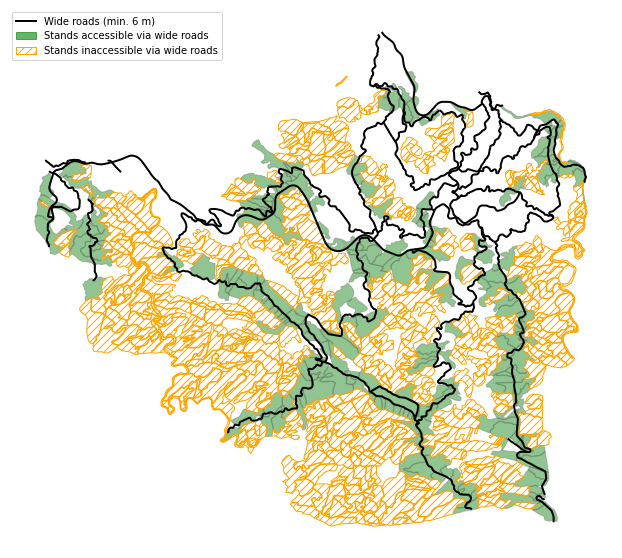

In [64]:
fig, ax = plt.subplots(figsize=(12, 10))

# Plot wide roads
fireroads.plot(ax=ax, color='black', label='Roads', lw=2)

# Plot accessible stands (solid fill)
stands_touching_fireroads.plot(ax=ax, color='forestgreen', alpha=0.5, edgecolor='grey')

# Plot inaccessible stands (striped hatch)
not_touching_fireroads.plot(ax=ax, facecolor='none', edgecolor='orange', hatch='///', linewidth=1)

# Custom legend handles
road_line = Line2D([0], [0], color='black', lw=2, label='Wide roads (min. 6 m)')
accessible_patch = mpatches.Patch(color='green', label=f'Stands accessible via wide roads', alpha=0.6)
inaccessible_patch = mpatches.Patch(facecolor='white', edgecolor='orange', hatch='///',
                                    label=f'Stands inaccessible via wide roads')

# Add legend and finalize
ax.legend(handles=[road_line, accessible_patch, inaccessible_patch], loc='upper left')
ax.axis('off')
plt.show()


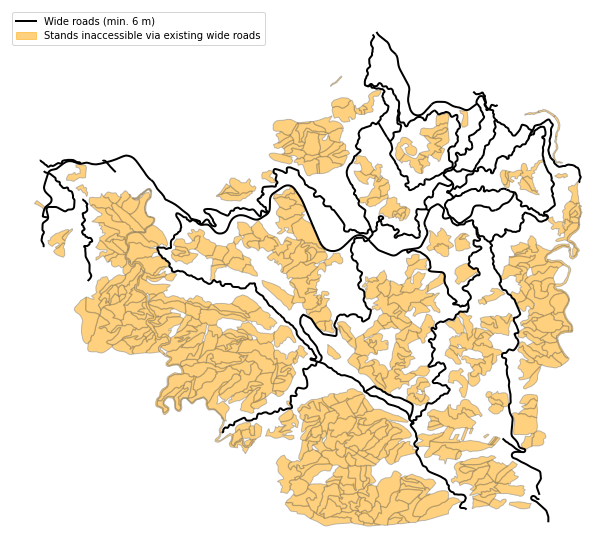

In [65]:
# visualize for big roads
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the roads
fireroads.plot(ax=ax, color='black', label='Roads', lw=2)

# Plot stands
not_touching_fireroads.plot(ax=ax, color='orange', label='Stands', alpha=0.5, edgecolor ='grey')

# Create custom legend handles
road_line = Line2D([0], [0], color='black', lw=2, label='Wide roads (min. 6 m)', alpha=1)  # Line for roads
stand_patch = mpatches.Patch(color='orange', label=f'Stands inaccessible via existing wide roads', alpha=0.5)
#touching_stand_patch = mpatches.Patch(color='green', label=f'Stands accessible via existing wide roads: {len(stands_touching_fireroads)}', alpha=0.5)

# Add the legend to the plot
ax.legend(handles=[road_line, stand_patch], loc='upper left')
ax.axis('off')

plt.show()

### 🏞 Further classification into timber access vs. no access

In [66]:
# continue for stands not touching big roads to split them up into inaccessible and party accessible
stands_timberroadonly = not_touching_fireroads[not_touching_fireroads.geometry.intersects(timberroads.unary_union)]

print(f"Stands partly accessible (timber roads only):")
print(len(stands_timberroadonly))

# subset of stands that are fully inaccessible
not_touching_anyroads = stands_buffered[~stands_buffered.geometry.intersects(timberroads.unary_union)]
print("Stands not touching any roads:")
print(len(not_touching_anyroads))

Stands partly accessible (timber roads only):
169
Stands not touching any roads:
315


#### 👁️ Plot Timber road access and no access

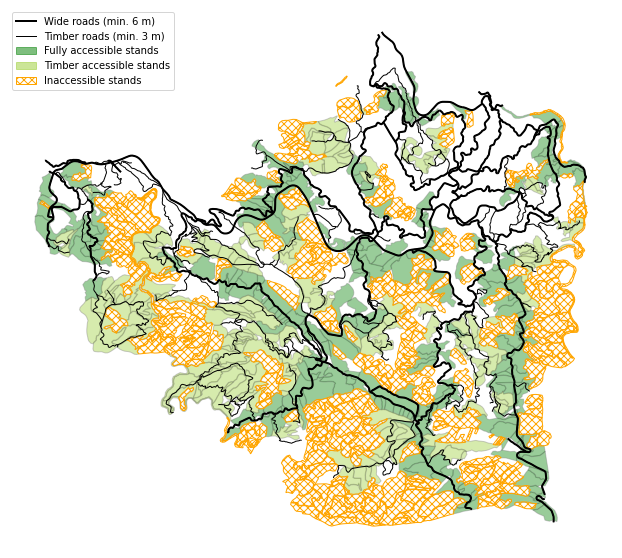

In [67]:
# visualize for big roads
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the roads
fireroads.plot(ax=ax, color='black', label='Wide roads', lw=2)
timberroads.plot(ax=ax, color='black', label='Roads', lw=1)

# Plot stands
stands_touching_fireroads.plot(ax=ax, color='green', alpha=0.4, edgecolor='grey')
stands_timberroadonly.plot(ax=ax, facecolor='none', color ='yellowgreen', alpha=0.4, edgecolor ='grey')
not_touching_anyroads.plot(ax=ax, edgecolor ='orange', hatch='xxx', facecolor='none')

# Create custom legend handles
road_line = Line2D([0], [0], color='black', lw=2, label='Wide roads (min. 6 m)', alpha=1)
road_line_small = Line2D([0], [0], color='black', lw=1, label='Timber roads (min. 3 m)', alpha=1) # Line for roads
stand_patch = mpatches.Patch(color='yellowgreen', label=f'Timber accessible stands', alpha=0.5)
not_patch = mpatches.Patch(edgecolor='orange', facecolor='none', label=f'Inaccessible stands', alpha=1, hatch='xxx')
touching_stand_patch = mpatches.Patch(color='green', label=f'Fully accessible stands', alpha=0.5)

# Add the legend to the plot
ax.legend(handles=[road_line, road_line_small, touching_stand_patch, stand_patch, not_patch],
          loc='upper left')
ax.axis('off')

plt.show()

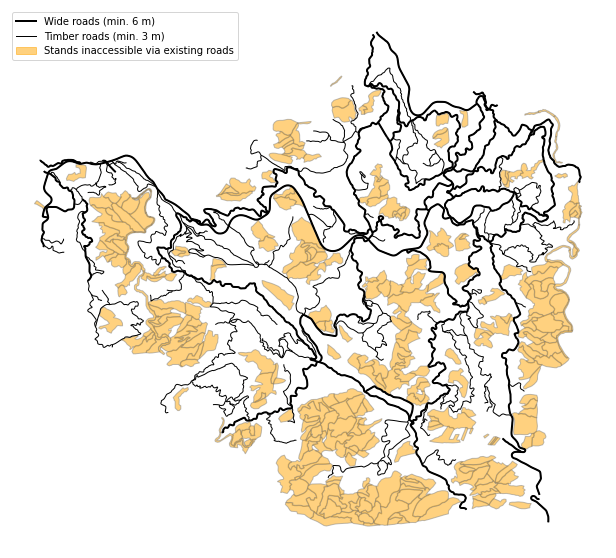

In [68]:
# visualize for big roads
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the roads
fireroads.plot(ax=ax, color='black', label='Wide roads', lw=2)
timberroads.plot(ax=ax, color='black', label='Roads', lw=1)

# Plot stands
not_touching_anyroads.plot(ax=ax, color='orange', label='Stands', alpha=0.5, edgecolor ='grey')

# Create custom legend handles
road_line = Line2D([0], [0], color='black', lw=2, label='Wide roads (min. 6 m)', alpha=1)
road_line_small = Line2D([0], [0], color='black', lw=1, label='Timber roads (min. 3 m)', alpha=1) # Line for roads
stand_patch = mpatches.Patch(color='orange', label=f'Stands inaccessible via existing roads', alpha=0.5)
#touching_stand_patch = mpatches.Patch(color='green', label=f'Stands accessible via existing wide roads: {len(stands_touching_fireroads)}', alpha=0.5)

# Add the legend to the plot
ax.legend(handles=[road_line, road_line_small, stand_patch], loc='upper left')
ax.axis('off')

plt.show()

### 📝 Update stands dataframe with new column for accessibility

In [69]:
# create 'access' column in stands based on conditions
stands['road_access'] = stands.ID_UG.apply(
    lambda x: 'timber' if x in stands_timberroadonly.ID_UG.values else (
        'full' if x in stands_touching_fireroads.ID_UG.values else 'none'
    )
)
stands.head(2)

,OBJECTID,TARGET_FID,LandUse_1,Ocupacao,ID_UG,NOME,YY_correct,XX_Correct,Altitude,Declive,...,Hectares,UsoSolo20,Shape_Leng,Shape_Area,HBC,CH,CBD,CC,geometry,road_access
0,127,757,1,EcPb_3_9_3_Pv,836,Castelo de Paiva,154379.276963,-9216.013743,177.0,16.8833,...,15.015687,Eucalipto,2215.335044,150156.870494,2.9,0.0,0.0,0.0,"POLYGON ((-8904.284 154402.877, -8864.968 1543...",full
1,128,758,1,EcEc_3_10_2_Pv,837,Castelo de Paiva,153027.146729,-21569.125860,151.0,11.6688,...,17.097563,Eucalipto,2076.935175,170975.628174,2.9,0.0,0.0,0.0,"POLYGON ((-21287.683 153143.277, -21333.710 15...",full


In [70]:
stands.road_access.value_counts()

road_access
none      315
full      203
timber    169
Name: count, dtype: int64

### 💾 Save lists of stands according to accessibility

In [71]:
# Extract 'ID_UG' column and save as CSV files

folder_path = '1_Preprocessed_Data/1_Stand_Accessibility'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the CSV files in the created folder
stands_touching_fireroads[['ID_UG']].to_csv(f'{folder_path}/stands_accessible.csv', index=False)
stands_timberroadonly[['ID_UG']].to_csv(f'{folder_path}/stands_timberroadonly.csv', index=False)
not_touching_anyroads[['ID_UG']].to_csv(f'{folder_path}/stands_inaccessible.csv', index=False)

In [72]:
stands.to_csv(f'{folder_path}/stands_total.csv', index=False)